## Graph Isomorphism
---

## What is the Graph Isomorphism problem?
---
The graph isomorphism problem is the computational problem of determining whether two finite graphs are isomorphic, being of identical or similar form, shape, or structure.

Designing an efficient algorithm to test this is a famous unsolved problem.

Two Graphs A and B are isomorphic if there is a bijection from the vertex set of A to the vertex set of B such that adjacency and non-adjacency are preserved. A bijection is when there is no unpaired elements. Below is an example of graphs that are isomorphic. See figure 1.

While two graphs may look similar in structure, it is not right to assume that they are isomorphic.
A graph can exist in different forms having the same number of vertices, edges, and also the same edge connectivity.These such graphs would be called isomorphic.



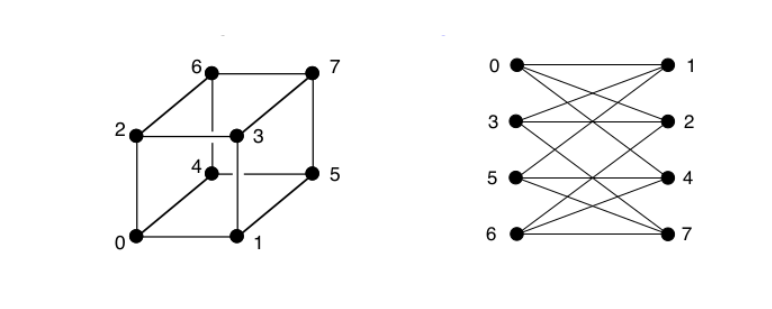
<i>Figure 1. Isomorphic Graphs Examples</i>


# How Graphs can be represented in data structures
---

### What is a Graph in data structures?
---
A graph is a common data structure that consists of a finite set of nodes or vertices and a set of edges connecting them.
A pair (x,y) is referred to as an <b>edge</b>, which shows that the x vertex connects to the y vertex.

### Types of Graphs
---

<b>Undirected Graph</b>

In an undirected graph, nodes are connected by edges that are all bidirectional.

Meaning that if there is an edge connecting node A and node B, we can traverse from node A to node B, and also from node B to node A.

An example diagram is shown below:
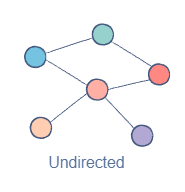

<b>Directed Graph</b>

In a directed graph, nodes only go in one direction. An example of this would be a binary tree. We can only traverse the way that the arrows in the graph dictate, not in the opposite direction.

An example diagram is shown below:
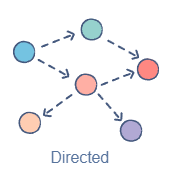

### Graph Representations
<b>Adjacency Matrix</b>
One of the most frequent graph representations is an Adjacency Matrix.

An adjacency matrix is a 2D Array of size N x N, where N is the number of nodes in the graph.It is used to show if there are any connections between the nodes in the graph, which will be used later for trying to determine isomorphism between two graphs.


An example diagram is shown below:
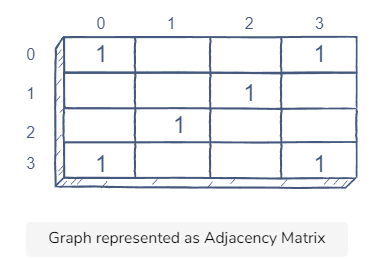

# Determining Isomorphism using Python
---
Below are the python functions used to determine if two graphs are isomorphic or not.

In [1]:

def get_graph_order(adj_matrix):
    if len(adj_matrix) != len(adj_matrix[0]):
        return -1
    else:
        return len(adj_matrix)


def get_degree_sequence(adj_matrix):
    degree_sequence = []
    for vertex in range(len(adj_matrix)):
        degree_sequence.append(sum(adj_matrix[vertex]))
    degree_sequence.sort(reverse=True)
    return degree_sequence


def get_all_vertex_permutations(adj_matrix):
    if get_graph_order(adj_matrix) > 8:
        print("This function is too inefficient for graph order > 8")
        return -1
    all_adj_matrix = []
    idx = list(range(len(adj_matrix)))
    possible_idx_combinations = [
        list(i) for i in itertools.permutations(idx, len(idx))
    ]
    for idx_comb in possible_idx_combinations:
        a = adj_matrix
        a = a[idx_comb]
        a = np.transpose(np.transpose(a)[idx_comb])
        all_adj_matrix.append({
            "perm_vertex":
            idx_comb,
            "adj_matrix":
            a
        })

    return all_adj_matrix


def brute_force_test_graph_isomporphism(adj_1, adj_2):
    degree_sequence_1 = get_degree_sequence(adj_1)
    degree_sequence_2 = get_degree_sequence(adj_2)
    if get_graph_order(adj_1) != get_graph_order(adj_1):
        return False
    elif np.array_equal(degree_sequence_1, degree_sequence_2) == False:
        return False
    else:
        for adj_matrix in list(
                map(lambda matrix: matrix["adj_matrix"],
                    get_all_vertex_permutations(adj_2))):
            if np.array_equal(adj_1, adj_matrix) == True:
                return True
    return False

# Code Implementation.
---


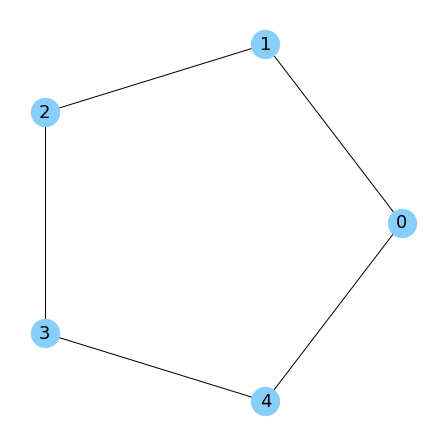

In [2]:
#Imports
#Permutations
import itertools

#Matrices
import numpy as np

# Plots.
import matplotlib.pyplot as plt

# Resize plots.
plt.rcParams['figure.figsize'] = (6, 6)

# Graphs.
import networkx as nx

# Math.
import math

# Networkx drawing parameters.
params = {'node_color': 'lightskyblue', 'node_size': 800, 'font_size': 18, 'with_labels': True}

#First Graph Creation.

# Create an empty graph.
G = nx.Graph()

# Create a set of edges.
E = ((0, 1), (1, 2), (2,3),(3,4),(0,4))

# Incorporate the edges in G.
# The nodes are just created as needed, based on E.
G.add_edges_from(E)

# Draw 
nx.draw_circular(G, **params)


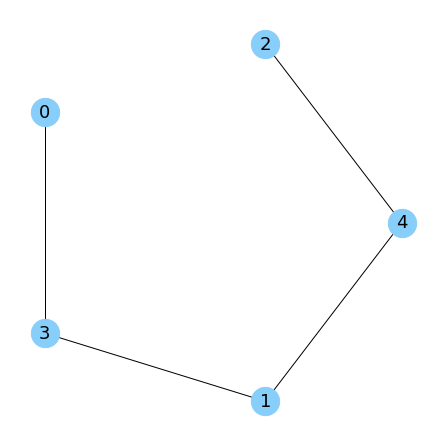

In [3]:
## Second Graph Creation.
H = nx.Graph()
F = ((4, 2), (0,3),(3,1),(1,4))
H.add_edges_from(F)
nx.draw_circular(H, **params)

In [4]:
#Next we will convert these graphs to adjacency matrixes
GM = nx.to_numpy_array(G)
print(GM)

[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]


In [5]:
HM = nx.to_numpy_array(H)
print(HM)


[[0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]


In [6]:
get_graph_order(GM)



5

In [7]:
get_graph_order(HM)

5

In [8]:
get_all_vertex_permutations(GM)


[{'perm_vertex': [0, 1, 2, 3, 4],
  'adj_matrix': array([[0., 1., 0., 0., 1.],
         [1., 0., 1., 0., 0.],
         [0., 1., 0., 1., 0.],
         [0., 0., 1., 0., 1.],
         [1., 0., 0., 1., 0.]])},
 {'perm_vertex': [0, 1, 2, 4, 3],
  'adj_matrix': array([[0., 1., 0., 1., 0.],
         [1., 0., 1., 0., 0.],
         [0., 1., 0., 0., 1.],
         [1., 0., 0., 0., 1.],
         [0., 0., 1., 1., 0.]])},
 {'perm_vertex': [0, 1, 3, 2, 4],
  'adj_matrix': array([[0., 1., 0., 0., 1.],
         [1., 0., 0., 1., 0.],
         [0., 0., 0., 1., 1.],
         [0., 1., 1., 0., 0.],
         [1., 0., 1., 0., 0.]])},
 {'perm_vertex': [0, 1, 3, 4, 2],
  'adj_matrix': array([[0., 1., 0., 1., 0.],
         [1., 0., 0., 0., 1.],
         [0., 0., 0., 1., 1.],
         [1., 0., 1., 0., 0.],
         [0., 1., 1., 0., 0.]])},
 {'perm_vertex': [0, 1, 4, 2, 3],
  'adj_matrix': array([[0., 1., 1., 0., 0.],
         [1., 0., 0., 1., 0.],
         [1., 0., 0., 0., 1.],
         [0., 1., 0., 0., 1.],
    

In [9]:
get_all_vertex_permutations(HM)

[{'perm_vertex': [0, 1, 2, 3, 4],
  'adj_matrix': array([[0., 1., 0., 0., 1.],
         [1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 1., 0., 1.],
         [1., 0., 0., 1., 0.]])},
 {'perm_vertex': [0, 1, 2, 4, 3],
  'adj_matrix': array([[0., 1., 0., 1., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 1.],
         [0., 0., 1., 1., 0.]])},
 {'perm_vertex': [0, 1, 3, 2, 4],
  'adj_matrix': array([[0., 1., 0., 0., 1.],
         [1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 1.],
         [0., 0., 1., 0., 0.],
         [1., 0., 1., 0., 0.]])},
 {'perm_vertex': [0, 1, 3, 4, 2],
  'adj_matrix': array([[0., 1., 0., 1., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 1.],
         [1., 0., 1., 0., 0.],
         [0., 0., 1., 0., 0.]])},
 {'perm_vertex': [0, 1, 4, 2, 3],
  'adj_matrix': array([[0., 1., 1., 0., 0.],
         [1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.],
    

In [10]:
brute_force_test_graph_isomporphism(GM, HM)

False

# Computational Complexity of the Graph Isomorphism Problem
---

# References
 What is a graph data structure: https://www.educative.io/edpresso/what-is-a-graph-data-structure
 
 Learning about Adjacency Matrix: simplilearn.com/tutorials/data-structure-tutorial/graphs-in-data-structure
 
 Learning how to draw pentagon edge set: https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570
 
 Code implementation help: https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570
 
 
 